# Analysis for Future Expansion Opportunities

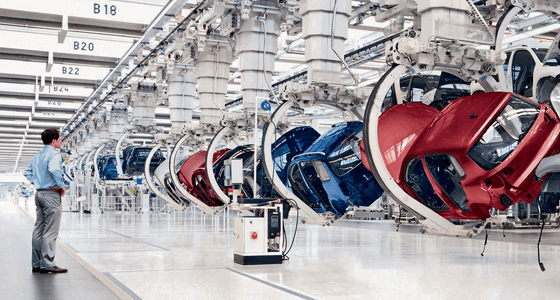

## Introduction

For this case study, there is a wholesale distributor known as The Vehicle Distributors, serving customers in more than 15 nations. They have reached out to us to assist in an essential task involving data analysis. The primary goal of this project is to respond to their queries and offer fact-based solutions by analyzing the accessible data.

The following is the provided dataset and corresponding schema which contains eight tables:

- **Customers:** Information about the customer base
- **Employees:** Comprehensive details about all staff members
- **Offices:** Data regarding the various sales offices
- **Orders:** Records of sales orders made by customers
- **OrderDetails:** Specifics of sales order lines associated with each sales order
- **Payments:** Records of payments made by customers
- **Products:** A comprehensive list of scale model cars
- **ProductLines:** A categorization of product lines for refence

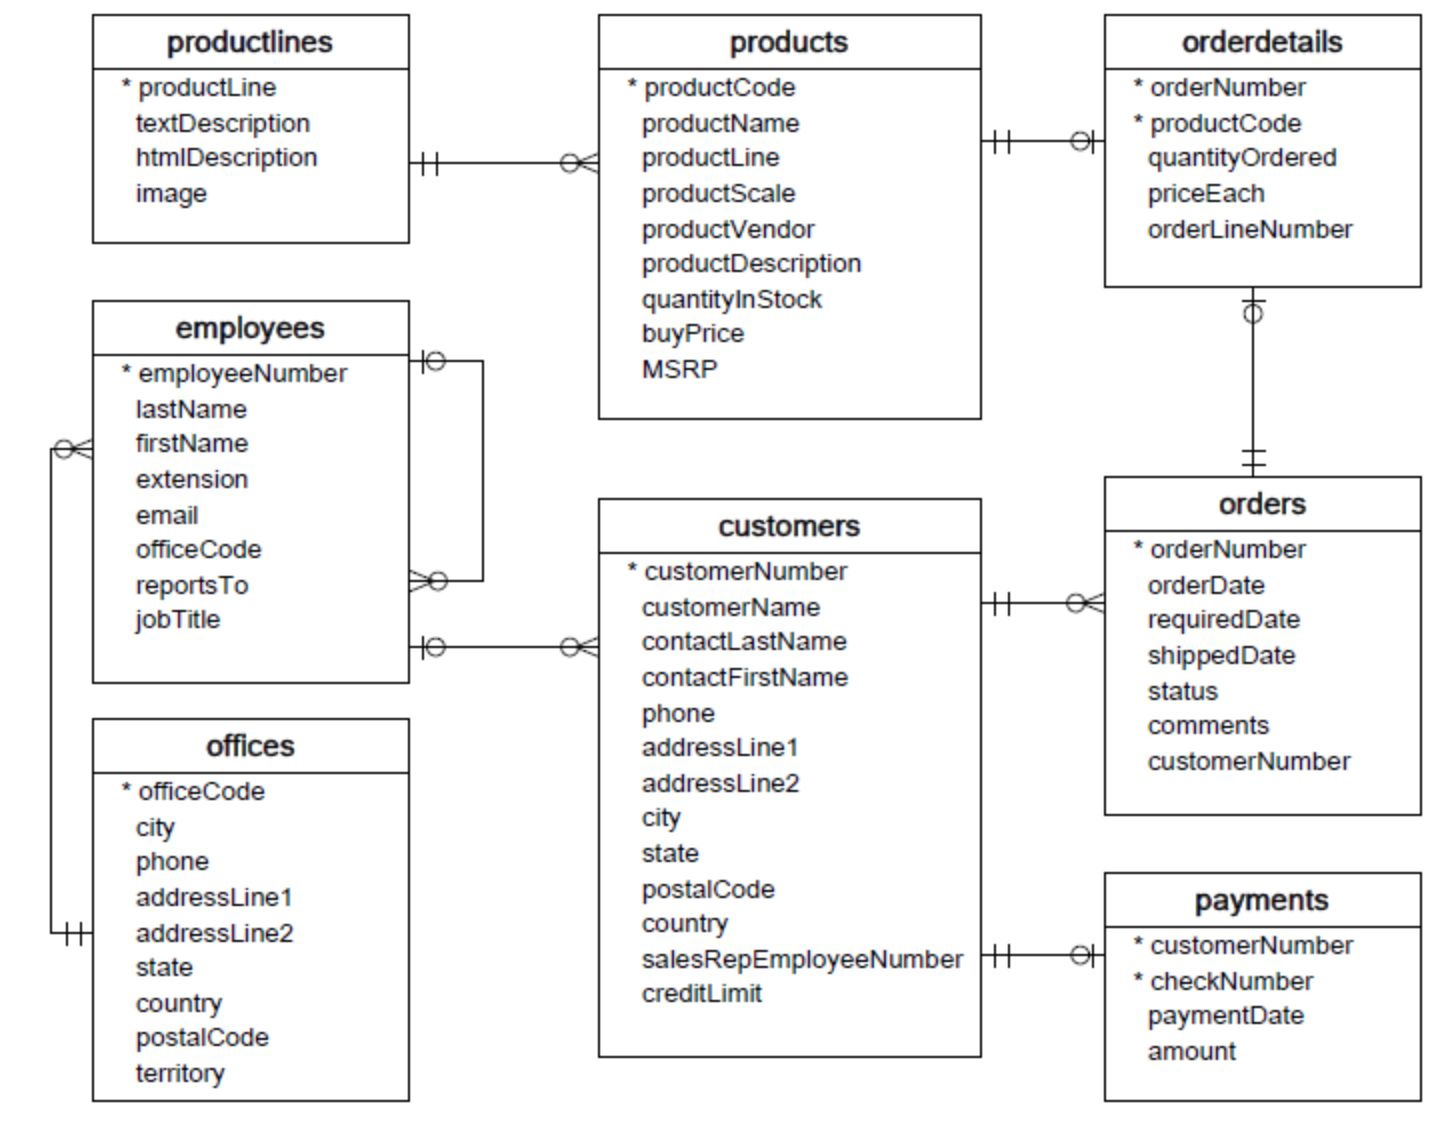

In [9]:
%%capture
%load_ext sql
%sql sqlite:///stores.db

## Exploring the dataset

In [11]:
# Displaying the first five rows from the product table

In [12]:
%%sql
SELECT *
FROM products LIMIT 5;

 * sqlite:///stores.db
Done.


productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front suspension, gear-shift lever, footbrake lever, drive chain, wheels and steering. All parts are particularly delicate due to their precise scale and require special care and attention.",7933,48.81,95.7
S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.,7305,98.58,214.3
S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand, diecast metal with plastic parts and baked enamel finish.",6625,68.99,118.94
S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos and insignias, detachable rear wheelie bar, heavy diecast metal with resin parts, authentic multi-color tampo-printed graphics, separate engine drive belts, free-turning front fork, rotating tires and rear racing slick, certificate of authenticity, detailed engine, display stand\r\n, precision diecast replica, baked enamel finish, 1:10 scale model, removable fender, seat and tank cover piece for displaying the superior detail of the v-twin engine",5582,91.02,193.66
S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.,3252,85.68,136


In [13]:
# Exploring the different types of product lines

In [14]:
%%sql 
SELECT DISTINCT productLine 
FROM productlines p;

 * sqlite:///stores.db
Done.


productLine
Classic Cars
Motorcycles
Planes
Ships
Trains
Trucks and Buses
Vintage Cars


In [15]:
# Exploring how many customers each country has

In [16]:
%%sql
SELECT country, COUNT(customerNumber) as customers
FROM customers c 
GROUP BY TRIM(country);

 * sqlite:///stores.db
Done.


country,customers
Australia,5
Austria,2
Belgium,2
Canada,3
Denmark,2
Finland,3
France,12
Germany,13
Hong Kong,1
Ireland,2


In [17]:
# In a single table, retrieve the table name as a string, the number of attributes and the number of rows

In [20]:
%%sql
SELECT 'Customers' AS table_name, 13 AS number_of_attribute, COUNT(*) AS number_of_row FROM Customers
  
UNION ALL

SELECT 'Products' AS table_name, 9 AS number_of_attribute, COUNT(*) AS number_of_row FROM Products

UNION ALL

SELECT 'ProductLines' AS table_name, 4 AS number_of_attribute, COUNT(*) AS number_of_row FROM ProductLines

UNION ALL

SELECT 'Orders' AS table_name, 7 AS number_of_attribute, COUNT(*) AS number_of_row FROM Orders

UNION ALL

SELECT 'OrderDetails' AS table_name, 5 AS number_of_attribute, COUNT(*) AS number_of_row FROM OrderDetails

UNION ALL

SELECT 'Payments' AS table_name, 4 AS number_of_attribute, COUNT(*) AS number_of_row FROM Payments

UNION ALL

SELECT 'Employees' AS table_name, 8 AS number_of_attribute, COUNT(*) AS number_of_row FROM Employees

UNION ALL

SELECT 'Offices' AS table_name, 9 AS number_of_attribute, COUNT(*) AS number_of_row FROM Offices;

 * sqlite:///stores.db
Done.


table_name,number_of_attribute,number_of_row
Customers,13,122
Products,9,110
ProductLines,4,7
Orders,7,326
OrderDetails,5,2996
Payments,4,273
Employees,8,23
Offices,9,7


# Analyzing the dataset

The project's objective is to perform a comprehensive analysis of data within a sales records database, aiming to uncover valuable insights that will enhance the decision-making process. Effective data analysis in the realm of sales has consistently proven its ability to generate crucial key performance indicators (KPIs), resulting in more informed and streamlined decision-making procedures. Through the utilization of data analysis, significant savings in time, resources, and finances can be achieved. The scope of sales data analysis encompasses various dimensions, including sales performance, production, customer satisfaction, and employee productivity, which present a spectrum of challenges to be addressed. To realize the project's aim, we will explore the following inquiries in order to reveal actionable insights.

- **Question 1:** Which products should we order more of or less of?
- **Question 2:** How should we tailor marketing and communication strategies to customer behaviors?
- **Question 3:** How much can we spend on acquiring new customers?
- **Question 4:** For optimal returns, which countries should be the focus of our marketing efforts?
- **Question 5:** Determine the most and least favorable categories for each country.
- **Question 6:** What was the sales performance throughout the entire duration when sales were recorded?
- **Question 7:** Evaluate the performance of our current sales team.
- **Question 8:** Are there any items in our stock that have not been sold at all?
- **Question 9:** Provide a list of top spenders from each country.


# Question 1: Which products should we order more of or less of?

This inquiry concerns inventory reports, with a specific emphasis on two facets: the identification of items with limited availability (namely, products in high demand) and an evaluation of product performance. Through the exploration of these dimensions, the objective is to optimize supply management and enhance customer satisfaction by averting situations where popular products become unavailable. Emphasis is placed on restocking items with high product performance that are nearing depletion, ensuring the swift replenishment of the most successful and sought-after products. This approach is aligned with the overarching goal of sustaining sufficient inventory levels and satisfying customer needs.

In [21]:
# What are the top 10 lowest stocks for each product?

In [26]:
%%sql
	SELECT p.productCode, p.productName, SUM(o.quantityOrdered) / p.quantityInStock AS low_stock
	  FROM products p
	  JOIN orderdetails o 
		ON p.productCode = o.productCode 
  GROUP BY p.productCode 
  ORDER BY low_stock DESC 
     LIMIT 10;

 * sqlite:///stores.db
Done.


productCode,productName,low_stock
S24_2000,1960 BSA Gold Star DBD34,67
S12_1099,1968 Ford Mustang,13
S32_4289,1928 Ford Phaeton Deluxe,7
S32_1374,1997 BMW F650 ST,5
S72_3212,Pont Yacht,2
S700_3167,F/A 18 Hornet 1/72,1
S700_1938,The Mayflower,1
S50_4713,2002 Yamaha YZR M1,1
S32_3522,1996 Peterbilt 379 Stake Bed with Outrigger,1
S18_2795,1928 Mercedes-Benz SSK,1


In [25]:
# What are the top 10 product performances for each product?

In [33]:
%%sql
    SELECT p.productCode, p.productName, ROUND(SUM(o.quantityOrdered * o.priceEach), 2) AS product_performance
	  FROM orderdetails o
	  JOIN products p
		ON o.productCode = p.productCode
  GROUP BY o.productCode
  ORDER BY product_performance DESC
	 LIMIT 10;

 * sqlite:///stores.db
Done.


productCode,productName,product_performance
S18_3232,1992 Ferrari 360 Spider red,276839.98
S12_1108,2001 Ferrari Enzo,190755.86
S10_1949,1952 Alpine Renault 1300,190017.96
S10_4698,2003 Harley-Davidson Eagle Drag Bike,170686.0
S12_1099,1968 Ford Mustang,161531.48
S12_3891,1969 Ford Falcon,152543.02
S18_1662,1980s Black Hawk Helicopter,144959.91
S18_2238,1998 Chrysler Plymouth Prowler,142530.63
S18_1749,1917 Grand Touring Sedan,140535.6
S12_2823,2002 Suzuki XREO,135767.03


In [34]:
# Combining queries to display priority products for restocking

In [36]:
%%sql
	  WITH
	  tab1 AS (
	  SELECT
				p.productCode
		FROM
			  (
			  SELECT
					 p.productCode, p.productName,
					 SUM(o.quantityOrdered)/p.quantityInStock AS low_stock
			    FROM
					 products p
				JOIN
					 orderdetails o
				  ON
				     p.productCode = o.productCode
			GROUP BY
					 p.productCode
			ORDER BY
					 low_stock DESC) p ),
	  tab2 AS (
	  SELECT
				p.productCode
		FROM
			  (
			  SELECT
					 p.productCode, p.productLine, p.productName,
					 ROUND(SUM(o.quantityOrdered * o.priceEach), 2) as product_performance
			    FROM
					 orderdetails o
				JOIN
				     products p
				  ON
				     p.productCode = o.productCode
			GROUP BY
					 p.productCode
			ORDER BY
					 product_performance DESC
			   LIMIT
					 10) p )
	   SELECT p.productCode, p.productName, p.productLine
	     FROM products p
		WHERE p.productCode IN tab1 AND p.productCode IN tab2;

 * sqlite:///stores.db
Done.


productCode,productName,productLine
S10_1949,1952 Alpine Renault 1300,Classic Cars
S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles
S12_1099,1968 Ford Mustang,Classic Cars
S12_1108,2001 Ferrari Enzo,Classic Cars
S12_2823,2002 Suzuki XREO,Motorcycles
S12_3891,1969 Ford Falcon,Classic Cars
S18_1662,1980s Black Hawk Helicopter,Planes
S18_1749,1917 Grand Touring Sedan,Vintage Cars
S18_2238,1998 Chrysler Plymouth Prowler,Classic Cars
S18_3232,1992 Ferrari 360 Spider red,Classic Cars


There is a notable preference for classic cars, indicating a need for prompt restocking, while motorcycles are also in demand. In contrast, the interest in vintage cars and planes appears to be consistently distributed and relatively stable.






# Question 2: How should we tailor marketing and communication strategies to customer behaviors?

To tackle this, we will direct our attention towards the segmentation of customers into two discernible segments: VIP (Very Important Person) clientele and those who exhibit reduced levels of interaction. This classification enables the creation of tailored strategies to cater to the distinct requirements of each cluster.

In [39]:
# Exploring how much profit each customer generates

In [41]:
%%sql
	SELECT o.customerNumber, ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
	  FROM orders o
	  JOIN orderdetails od ON o.orderNumber = od.orderNumber
	  JOIN products p ON od.productCode = p.productCode
  GROUP BY o.customerNumber
  ORDER BY profit DESC;

 * sqlite:///stores.db
Done.


customerNumber,profit
141,326519.66
124,236769.39
151,72370.09
114,70311.07
119,60875.3
148,60477.38
187,60095.86
323,60013.99
131,58669.1
450,55931.37


In [42]:
# Using profit data, find the top five VIP customers

In [44]:
%%sql
	  WITH performance AS (
						SELECT o.customerNumber, ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
	  FROM orders o
	  JOIN orderdetails od ON o.orderNumber = od.orderNumber
	  JOIN products p ON od.productCode = p.productCode
  GROUP BY o.customerNumber
  ORDER BY profit DESC)
	SELECT c.contactLastName || " " || c.contactFirstName AS name, c.city, c.country
	  FROM customers c
	  JOIN performance ON performance.customerNumber = c.customerNumber
	 LIMIT 5;

 * sqlite:///stores.db
Done.


name,city,country
Freyre Diego,Madrid,Spain
Nelson Susan,San Rafael,USA
Young Jeff,NYC,USA
Ferguson Peter,Melbourne,Australia
Labrune Janine,Nantes,France


In [46]:
# Finding the top five least-engaged customers

In [48]:
%%sql
    WITH performance AS
(SELECT o.customerNumber, ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
    FROM orders o
    JOIN orderdetails od ON od.orderNumber = o.orderNumber
    JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit)
  SELECT c.contactLastName ||" "||c.contactFirstName as name,c.city,c.country, profit
    FROM customers c 
    JOIN performance ON performance.customerNumber = c.customerNumber  
   LIMIT 5;

 * sqlite:///stores.db
Done.


name,city,country,profit
Young Mary,Glendale,USA,2610.87
Taylor Leslie,Brickhaven,USA,6586.02
Ricotti Franco,Milan,Italy,9532.93
Schmitt Carine,Nantes,France,10063.8
Smith Thomas,London,UK,10868.04


To serve VIP customers, we can orchestrate exclusive events and endeavors with the objective of nurturing their loyalty and elevating their contentment. Meanwhile, for the less involved customer group, we can introduce particular campaigns and initiatives aimed at reigniting their interest and strengthening their connection with our brand. By customizing our initiatives according to customer segmentation, we can proficiently cultivate loyalty among our VIP clientele and rejuvenate the involvement of the less engaged customers.

# Question 3: How much can we spend on acquiring new customers?

To formulate a suitable budget for acquiring new customers, it is imperative to compute the Customer Lifetime Value (LTV), representing the average financial worth produced by a customer throughout their entire association with a business. This assessment aids in ascertaining the ideal budget allocation for marketing endeavors.

In [49]:
# Computing the average of customer profits

In [50]:
%%sql
      WITH performance AS (
					    SELECT o.customerNumber, ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
	  FROM orders o
	  JOIN orderdetails od ON o.orderNumber = od.orderNumber
	  JOIN products p ON od.productCode = p.productCode
  GROUP BY o.customerNumber
  ORDER BY profit)
    SELECT ROUND(AVG(profit),2) AS LTV
	  FROM performance;

 * sqlite:///stores.db
Done.


LTV
39039.59


The Lifetime Value (LTV) metric offers valuable insights into the earnings generated by an average customer during their entire interaction with our establishment. It empowers us to make forecasts about forthcoming profits. As an example, if we happen to gain ten new customers in the upcoming month, we can foresee a potential income of $390,395. This foresight equips us to make educated determinations concerning the allocation of resources for the acquisition of new customers.

# Question 4: For optimal returns, which countries should be the focus of our marketing efforts?

Owing to the expenses linked to marketing, it becomes pivotal to pinpoint markets where our approach will yield the most substantial profits. By concentrating our efforts on these particular markets, we can guarantee that our marketing initiatives yield the most significant return on investment, thereby assisting in the maximization of overall profitability.

In [53]:
%%sql
    SELECT c.country, ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
	  FROM orders o
	  JOIN orderdetails od ON od.orderNumber = o.orderNumber
	  JOIN products p ON p.productCode = od.productCode 
	  JOIN customers c ON o.customerNumber = c.customerNumber  
  GROUP BY c.country 
  ORDER BY profit DESC
	 LIMIT 5;

 * sqlite:///stores.db
Done.


country,profit
USA,1308815.59
Spain,440004.54
France,413016.12
Australia,222207.18
New Zealand,189506.58


It is prudent to channel our concentration towards markets situated in three diverse continents: North America, Europe, symbolized by Spain and France, and Oceania, denoted by Australia and New Zealand. By centering our marketing endeavors on these distinct markets, we can efficiently allocate resources and direct our attention toward seizing the most auspicious prospects within these regions, with the ultimate aim of amplifying our comprehensive business performance.

# Question 5: Determine the most and least favorable categories for each country

We'll use the number of product lines ordered as our measure to figure out which product lines are doing well and which ones aren't in each country. To do this, we'll look at the "order details" table and check how these product lines are represented in the "orders" table. This will help us see which ones are doing great and which ones are not doing so well in each country.

In [54]:
%%sql
	  WITH 
		   best_category AS 
		   (SELECT country, productLine, max(profit) as max_profit
      FROM (SELECT c.country ,p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
      FROM orders o
      JOIN orderdetails od ON od.orderNumber = o.orderNumber
      JOIN products p ON p.productCode = od.productCode 
	  JOIN customers c ON o.customerNumber = c.customerNumber  
  GROUP BY TRIM(c.country) ,p.productLine
  ORDER BY profit DESC)
  GROUP BY TRIM(country)
  ORDER BY max_profit DESC),
		   worst_category AS 
   (SELECT country, productLine, min(profit) as min_profit
	  FROM (SELECT c.country ,p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
	  FROM orders o
	  JOIN orderdetails od ON od.orderNumber = o.orderNumber
	  JOIN products p ON p.productCode = od.productCode 
	  JOIN customers c ON o.customerNumber = c.customerNumber  
  GROUP BY TRIM(c.country) ,p.productLine
  ORDER BY profit DESC)
  GROUP BY TRIM(country)
  ORDER BY min_profit DESC)
    SELECT best_category.country as Country,best_category.productLine as Best_Category, 
		   best_category.max_profit as Max_Profit,worst_category.productLine as Worst_Category, 
           worst_category.min_profit as Min_Profit
      FROM best_category
      JOIN worst_category ON best_category.country = worst_category.country
  GROUP BY best_category.country,best_category.productLine;

 * sqlite:///stores.db
Done.


Country,Best_Category,Max_Profit,Worst_Category,Min_Profit
Australia,Classic Cars,71331.4,Trains,1004.85
Austria,Classic Cars,37725.09,Ships,3332.43
Belgium,Vintage Cars,15374.27,Trains,2364.48
Canada,Classic Cars,25081.93,Motorcycles,983.18
Denmark,Classic Cars,55211.95,Trains,2759.88
Finland,Classic Cars,55937.56,Trains,1956.54
France,Classic Cars,164755.55,Trains,5670.23
Germany,Classic Cars,51386.03,Trucks and Buses,1670.64
Hong Kong,Planes,14113.27,Motorcycles,489.65
Ireland,Classic Cars,10418.83,Vintage Cars,847.56



The analysis makes it clear that Classic cars are the top product category, making up a big portion of 85.7%. Planes are the next favorite category with a share of 9.5%, followed by Vintage cars at 4.8%.

In contrast, Trains are the least favored category, making up a significant part at 62%. Motorcycles make up 14.3% of the less favored category, while Vintage cars contribute 9.5%. Ships, Trucks, and Buses, along with Classic cars, each represent a small 4.8% in the less favored categories.

# Question 6: What was the sales performance throughout the entire duration when sales were recorded?

To evaluate performance, we'll switch our attention to monthly sales performance, considering the profits earned in each month. By looking at the profitability for each month, we can gauge how well that month performed. If there's a higher profit, it means that month did better, but if there's a loss, it means it was a less favorable month.

In [55]:
%%sql
      WITH order_shipped AS
   (SELECT p.customerNumber , strftime('%Y-%m', p.paymentDate) as year_month, p.amount
      FROM payments p 
      JOIN orders o ON o.customerNumber =p.customerNumber 
     WHERE status = "Shipped"
  ORDER BY year_month)
    SELECT year_month, round(sum(amount),2)as total
      FROM order_shipped osh
      JOIN customers c ON c.customerNumber = osh.customerNumber
  GROUP BY year_month
  ORDER BY year_month;

 * sqlite:///stores.db
Done.


year_month,total
2003-01,89351.87
2003-02,1247289.83
2003-03,599113.44
2003-04,642905.52
2003-05,655731.4
2003-06,599498.29
2003-07,1197111.09
2003-08,2229925.11
2003-09,444833.59
2003-10,1777878.91


Spanning 2.5 years, the provided dataset uncovers significant spikes in November and December of 2004, as well as in March of 2005. Moreover, there's a consistent pattern of profit decline from April to June within this timeframe. This drop in profit could potentially be due to a range of factors or causes. Possible explanations may involve shifts in market demand, heightened competition, seasonal variations, economic circumstances, or internal operational hurdles.

# Question 7: Evaluate the performance of our current sales team

The Vehicle Distributors have devised a strategy for enlarging their sales workforce. However, before advancing with this sales team expansion, it's vital to assess the current sales team's performance. Moreover, there's a need to pinpoint the best-performing sales employee in each country, aiming to recognize and acknowledge their contributions.

In [56]:
# Current sales team performance

In [57]:
%%sql
      WITH best_employee AS 
   (SELECT c.country,c.city, e.employeeNumber ,e.lastName ,e.firstName ,e.jobTitle ,
           p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
      FROM orders o
      JOIN orderdetails od ON od.orderNumber = o.orderNumber
      JOIN products p ON p.productCode = od.productCode 
      JOIN customers c ON o.customerNumber = c.customerNumber 
      JOIN employees e ON e.employeeNumber = c.salesRepEmployeeNumber 
  GROUP BY e.employeeNumber 
  ORDER BY c.city,profit DESC)
    SELECT lastName ||" "|| firstName as name ,jobTitle, city, country, productLine, profit
      FROM best_employee
  ORDER BY country;

 * sqlite:///stores.db
Done.


name,jobTitle,city,country,productLine,profit
Fixter Andy,Sales Rep,Melbourne,Australia,Motorcycles,222207.18
Castillo Pamela,Sales Rep,Kobenhavn,Denmark,Classic Cars,340727.9
Bondur Loui,Sales Rep,Paris,France,Classic Cars,234891.07
Jones Barry,Sales Rep,Frankfurt,Germany,Vintage Cars,276659.25
Marsh Peter,Sales Rep,Auckland,New Zealand,Planes,230811.75
Nishi Mami,Sales Rep,Makati City,Philippines,Classic Cars,181181.8
Gerard Martin,Sales Rep,Barcelona,Spain,Ships,156878.63
Hernandez Gerard,Sales Rep,Madrid,Spain,Classic Cars,504644.71
Bott Larry,Sales Rep,Manchester,UK,Classic Cars,290203.59
Thompson Leslie,Sales Rep,Las Vegas,USA,Vintage Cars,138031.47


The company's highest profits are generated by the sales team in the USA, which accounts for 40% of the total sales across all countries. This outcome is expected, given the substantial contribution of the USA sales team. Following closely behind is the sales team in Spain, which secures the second spot in terms of profitability.

In [58]:
# Top performing employee by country 

In [60]:
%%sql
	  WITH best_employee AS 
   (SELECT c.country,c.city, e.employeeNumber ,e.lastName ,e.firstName ,e.jobTitle ,
           p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
      FROM orders o
      JOIN orderdetails od ON od.orderNumber = o.orderNumber
      JOIN products p ON p.productCode = od.productCode 
      JOIN customers c ON o.customerNumber = c.customerNumber 
      JOIN employees e ON e.employeeNumber = c.salesRepEmployeeNumber 
  GROUP BY e.employeeNumber 
  ORDER BY profit DESC)
    SELECT lastName ||" "|| firstName as name ,jobTitle,city,country, productLine, max(profit) as max_profit
      FROM best_employee
  GROUP BY country
  ORDER BY max_profit DESC;

 * sqlite:///stores.db
Done.


name,jobTitle,city,country,productLine,max_profit
Hernandez Gerard,Sales Rep,Madrid,Spain,Classic Cars,504644.71
Jennings Leslie,Sales Rep,San Francisco,USA,Vintage Cars,435208.35
Castillo Pamela,Sales Rep,Kobenhavn,Denmark,Classic Cars,340727.9
Bott Larry,Sales Rep,Manchester,UK,Classic Cars,290203.59
Jones Barry,Sales Rep,Frankfurt,Germany,Vintage Cars,276659.25
Bondur Loui,Sales Rep,Paris,France,Classic Cars,234891.07
Marsh Peter,Sales Rep,Auckland,New Zealand,Planes,230811.75
Fixter Andy,Sales Rep,Melbourne,Australia,Motorcycles,222207.18
Nishi Mami,Sales Rep,Makati City,Philippines,Classic Cars,181181.8


# Question 8: Are there any items in our stock that have not been sold at all?


Deadstock pertains to items that have lingered on shelves for an extended duration, posing financial challenges as they occupy storage space and pose a risk of potential losses from damage. Handling these unsold items is complex and comes with the threat of lingering costs.



In [63]:
%%sql
    SELECT productCode, productName,quantityInStock , buyPrice 
	  FROM products p
	 WHERE productCode NOT IN (SELECT productCode FROM orderdetails o);

 * sqlite:///stores.db
Done.


productCode,productName,quantityInStock,buyPrice
S18_3233,1985 Toyota Supra,7733,57.01


A potential strategy for tackling sluggish inventory involves contemplating the implementation of price reductions on deadstock. Despite the counterintuitive aspect of reducing prices on underperforming products, this approach can render the items more attractive to potential buyers. By offering more competitive prices than rivals (or even selling items at cost), you can hasten the sales process and, in the long run, save financial resources. Protracted retention of these items only prolongs the associated business costs.

# Question 9: Provide a list of top spenders from each country.

To stimulate increased spending among our valued customers, we've assembled a compilation of our top spenders from every country, arranging them in alphabetical order by their respective nations. In extending recognition and gratitude for their unwavering loyalty and support, we aspire to foster their ongoing patronage and elevate their shopping encounters with us.

In [64]:
# Find the customer from each country that has spent the most money at our store, alphabetically by country

In [65]:
%%sql
	  WITH  performance AS
			(SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
	  FROM orders o
	  JOIN orderdetails od ON od.orderNumber = o.orderNumber
	  JOIN products p ON p.productCode = od.productCode
  GROUP BY o.customerNumber
  ORDER BY profit DESC)
    SELECT c.contactLastName ||" "||c.contactFirstName as name,c.city,c.country, max(profit) as max_money_spent
      FROM customers c 
      JOIN performance ON performance.customerNumber = c.customerNumber 
  GROUP BY c.country
  ORDER BY c.country;

 * sqlite:///stores.db
Done.


name,city,country,max_money_spent
Ferguson Peter,Melbourne,Australia,70311.07
Pipps Georg,Salzburg,Austria,54724.68
Dewey Catherine,Bruxelles,Belgium,25861.96
Tamuri Yoshi,Vancouver,Canada,28882.99
Petersen Jytte,Kobenhavn,Denmark,50973.68
Suominen Kalle,Espoo,Finland,40095.85
Labrune Janine,Nantes,France,60875.3
Pfalzheim Henriette,Köln,Germany,36744.01
Gao Mike,Central Hong Kong,Hong Kong,16868.68
Cassidy Dean,Dublin,Ireland,19588.29


To honor the customer who has made significant contributions to your store, you can consider several thoughtful actions. Encourage the customer to share their insights, feedback, or suggestions about their experiences with your company, as their input can be invaluable in shaping the continued improvement of your products and services. Additionally, as a gesture of appreciation, you can provide the customer with exclusive benefits and incentives, such as granting them premier access to upcoming sales or events and offering special discounts to express your gratitude. Lastly, extending a personalized thank-you note or a small token of appreciation can go a long way in conveying your deep gratitude for their unwavering loyalty and support, reinforcing the strong bond between your store and its most dedicated patrons.

# Conclusion

## Company:

The profit surges witnessed in November and December of 2004, are possibly linked to the boost in sales during the holiday season when consumer spending traditionally rises. In a similar vein, the profit spike in March 2005 might be associated with seasonal elements such as spring sales or specific events and promotions during that period. It's plausible that the company executed successful marketing campaigns or promotional activities during these months, consequently leading to heightened sales and profitability. Special offers, discounts, and advertising endeavors could have played a role in these observed profit spikes.

Conversely, the profit dip across the April to June period might be attributable to a variety of factors. A plausible reason could be a seasonal drop in customer demand, typical during the spring and early summer months. Furthermore, increased competition or market saturation may have contributed to reduced sales and profit margins. Other variables, such as economic fluctuations, shifts in consumer behavior, or internal operational challenges, could have also influenced the descending profit trend. To pinpoint the precise cause behind the profit decline during this period, conducting additional analysis and procuring contextual information is imperative. To attain a comprehensive comprehension of the factors steering the profit decrease, accumulating data pertaining to overhead costs linked with each order, encompassing fees and discounts, is advisable. Furthermore, the collection of data related to credits or refunds issued for damaged goods would bolster a more exhaustive analysis.

## Existing Market:

To enhance our overall business performance, it's prudent to adopt a strategic approach that prioritizes marketing efforts on three pivotal continents. These key regions include North America, with a specific focus on the USA, Europe, signified by Spain and France, and Oceania, encompassing Australia and New Zealand. By channeling our resources and directing our attention to these specifically targeted markets, we can achieve enhanced efficiency and capitalize on the most auspicious opportunities available within these regions. This targeted approach is poised to make a significant contribution to the augmentation of our comprehensive business performance.

## Customers:

Personalized interactions and genuine acknowledgment are foundational to nurturing long-term relationships and encouraging repeat business. It's equally vital to appreciate and reward loyal customers. Specifically, for our VIP clientele, tailored initiatives and exclusive events can fortify loyalty while enhancing satisfaction. These exclusive experiences establish a heightened sense of exclusivity and further solidify their connection with our brand. Meanwhile, for less engaged customers, sparking renewed interest and increased involvement can be achieved through the launch of targeted campaigns and initiatives. By pinpointing their unique needs and preferences, we can craft promotions and experiences that resonate, effectively reigniting their enthusiasm for our brand.

## Products:

One effective strategy to leverage the popularity of Classic cars involves emphasizing their historical significance and the accompanying narratives. This approach can boost their value and desirability among customers. Additionally, for a more in-depth understanding of the reasons behind the lower favorability of certain product lines, broadening the categorization beyond the existing product line would be advantageous. For instance, for Trains, the creation of sub-categories based on manufacturing years or specific dates could yield insights into customers' preferences for distinct models. Notably, there is a lone product categorized as Deadstock, and it is advisable not to retain it, as it currently exerts a negative impact on profits. Implementing a reduction in the price of this product is a viable strategy to expedite its clearance from the inventory and recoup a portion of the associated costs. Acting promptly is critical to avert substantial losses, including potential product damage.

## Sales Representatives:

In the realm of sales representatives' performance, it's noteworthy that they are currently achieving positive results. Maintaining their motivation is crucial to drive customers in their respective regions towards making larger purchases and increasing order frequency.

A valuable strategy for boosting motivation involves publicly recognizing the top-performing sales employee. This recognition serves a dual purpose: celebrating their accomplishments and providing inspiration to the rest of the team. In addition to this acknowledgment, personalized rewards like bonuses, commissions, or gift cards can be extended to acknowledge their exceptional performance.

Furthermore, the demonstration of appreciation for their hard work and dedication can be carried out through team celebrations or events, such as a team lunch, a recognition ceremony, or an outing. By implementing these strategies, we can foster a motivating environment that not only recognizes and rewards sales representatives for their exceptional performance but also inspires others to excel in their roles.